search compounds with same features, such as connectivity

In [1]:
import requests
import time
import io

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw

In [4]:
prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
mydata = {'smiles': 'C(/C=C/Cl)Cl'}
#example options: 'same_stereo_isotope', 'same_stereo','same_isotope','same_connectivity'

#keyword: fastsomething after /compound/
#use same_connectivity as an example
identity_type = 'same_connectivity'
print('identity: ', identity_type)
#get the isomericsmiles 
url = prolog + '/compound/fastidentity/smiles/property/isomericsmiles/csv?identity_type=' + identity_type

res = requests.post(url, data=mydata)

file = io.StringIO(res.text)
file.readline()

#the first number is cid, the second is the corresponding smiles
for line in file:
    print(line)

identity:  same_connectivity
24726,"C(/C=C/Cl)Cl"

24883,"C(C=CCl)Cl"

5280970,"C(/C=C\Cl)Cl"

102602172,"[2H]/C(=C(/[2H])\Cl)/C([2H])([2H])Cl"

131875718,"[2H]C(=C([2H])Cl)C([2H])([2H])Cl"

169438232,"C(/[13CH]=C/Cl)Cl"



In [8]:
def sep_cid_smiles_from_result(line):
    sep_line = line.rstrip().split(',')
    cid = sep_line[0]
    sm = sep_line[1]
    return cid, sm

In [10]:
cids = []
sms = []

file = io.StringIO(res.text)
file.readline()

for line in file:
    cid, sm = sep_cid_smiles_from_result(line)
    cids.append(cid)
    sms.append(sm)

print(cids)
print(sms)

['24726', '24883', '5280970', '102602172', '131875718', '169438232']
['"C(/C=C/Cl)Cl"', '"C(C=CCl)Cl"', '"C(/C=C\\Cl)Cl"', '"[2H]/C(=C(/[2H])\\Cl)/C([2H])([2H])Cl"', '"[2H]C(=C([2H])Cl)C([2H])([2H])Cl"', '"C(/[13CH]=C/Cl)Cl"']


In [17]:
#need to remove a layer of quotemark
sms_cln = [sm.replace("\"", "") for sm in sms]
sms_cln

['C(/C=C/Cl)Cl',
 'C(C=CCl)Cl',
 'C(/C=C\\Cl)Cl',
 '[2H]/C(=C(/[2H])\\Cl)/C([2H])([2H])Cl',
 '[2H]C(=C([2H])Cl)C([2H])([2H])Cl',
 'C(/[13CH]=C/Cl)Cl']

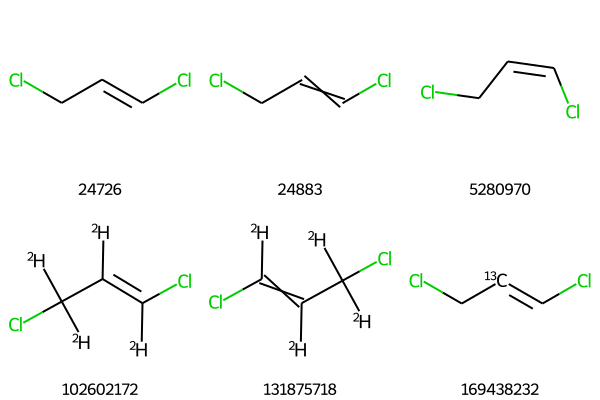

In [18]:
#visualise the selected smiles
mols = []
for sm in sms_cln:
    mol = Chem.MolFromSmiles(sm) #convert smiles to mol
    Chem.FindPotentialStereoBonds(mol) #identify stereo centres
    mols.append(mol)

img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200,200), legends=cids) # draw all the structures in a batch
display(img)